In [5]:
import numpy as np     #只需要下载numpy库即可
import random
import GridWorld_v3
from draw import draw  #绘图函数

In [6]:
rows = 5      #记得行数和列数这里要同步改
columns = 5
gridworld = GridWorld_v3.GridWorld_v3(forbiddenAreaScore=-1, score=1,desc = [".....",".##..","..#..",".#T#.",".#..."]) 
gridworld.show()
trajectorySteps = 1000

⬜️⬜️⬜️⬜️⬜️
⬜️🚫🚫⬜️⬜️
⬜️⬜️🚫⬜️⬜️
⬜️🚫✅🚫⬜️
⬜️🚫⬜️⬜️⬜️


In [10]:
#policy evaluation

policy = 0.2 * np.ones((rows*columns,5))
gamma = 0.99

value = np.zeros(rows*columns)
value0 = value.copy()+1

while(np.sum((value0-value)**2)>0.0001):
    value0 = value.copy()
    for i in range(rows * columns):   #使用当前策略policy，计算每个state的value，进行迭代
        value[i] = 0

        #这里是最重要的
        if i == 17:
            value[i] = 1 + value0[17] * gamma #贝尔曼迭代
            continue
        
        # value[17] = 0.28
        
        for j in range(0,5):
            score, nextState = gridworld.getScore(i,j)   #返回得分以及下一步的state id
            value[i] += 0.2 * (score + value0[nextState] * gamma) #贝尔曼迭代



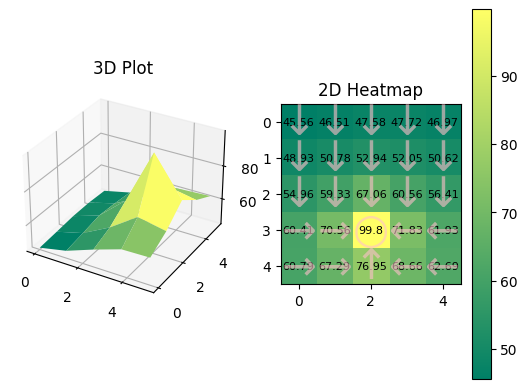

In [13]:
action_values = np.ones((rows*columns,5))
for i in range(25):
    for j in range(5):
        score, nextState = gridworld.getScore(i,j)
        action_values[i][j] = score + gamma * value[nextState]
p = np.argmax(action_values,axis=1)
draw(value.reshape(5,5), p)